In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
df = pd.read_csv ('Dataset1.csv')
print (df)


                                        INTENT  ID Unnamed: 2
0                       Undo the last sentence   1        NaN
1                           Undo the last word   1        NaN
2               Can you undo the last sentence   1        NaN
3                         Please undo the text   1        NaN
4                       Undo the selected text   1        NaN
..                                         ...  ..        ...
423             Please delete all text in bold  26        NaN
424             Kindly delete all text in bold  26        NaN
425                   Erase the last paragraph  26        NaN
426  Erase the last two words of that sentence  26        NaN
427                      Please erase all text  26        NaN

[428 rows x 3 columns]


In [4]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [6]:

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
for index, row in df_shuffled.iterrows():

    tts_string=row['INTENT']
    tts_string=tts_string.lower() #lower case

    #lemmatize, then remove stopwords
    lemmatizer=WordNetLemmatizer()
    lemmatised_string=word_tokenize(tts_string)
    tts_string=""
    for word in lemmatised_string:
        tts_string=tts_string+lemmatizer.lemmatize(word)+" "
    tts_string=tts_string.strip()
    # print(tts_string)

    #remove stopwords
    tokens = word_tokenize(tts_string)
    result = [i for i in tokens if not i in STOPWORDS]
    
    
    custom_stopwords = ['please','could','kindly']
    # using list comprehension to perform task 
    result = [i for i in result if i not in custom_stopwords] 


    # print(result)
    preprocessed_string=""
    preprocessed_string= ' '.join(map(str, result)) 
    print(preprocessed_string)
    # row['INTENT']=preprocessed_string

    #remove certain words
    #lemmatization
    #convert digits to numerals
    #text canonicalization?

    df_shuffled.at[index,'INTENT']=preprocessed_string

centr-align last word paragraph
capitalize last two character subscript
remove superscript last character
stop dictation near word bold
end bullet selected line
unitalicized first sentence
left align image
right align paragraph
change selected text italic
underline selected word
undo selected text
format bold
remove formatting line
remove superscript
strikethrough font size
stop dictation near underlined word
insert bullet line page
underline
remove bold last two sentence
undo last word
unbold
remove subscript
centre-align first word paragraph
insert comment line
stop dictation near word bold
insert bullet
command present
delete last two line paragraph
present command
delete selected text ?
remove superscript
remove subscript
unbold
reveal command
shift text right
undo last sentence
remove bold selected text
right align first word content
type character superscript
right align icon
delete text bold
superscript
remove last two character subscript
halt dictation near bold text
clear bold

In [5]:
df_shuffled.ID.value_counts()

6     26
26    25
18    23
14    22
13    21
24    21
23    20
17    19
2     19
1     18
22    18
3     17
4     17
15    15
5     15
19    14
16    14
21    13
12    13
25    13
9     12
20    12
8     11
7     10
10    10
11    10
Name: ID, dtype: int64

In [7]:
print(df_shuffled)

                                      INTENT  ID Unnamed: 2
0            centr-align last word paragraph  14        NaN
1    capitalize last two character subscript  10        NaN
2          remove superscript last character   9        NaN
3              stop dictation near word bold  23        NaN
4                   end bullet selected line  21        NaN
..                                       ...  ..        ...
423          underline last n word subscript  10        NaN
424            stop dictation near bold word  23        NaN
425                        remove formatting  18        NaN
426     undo strikethrough first 2 character  13        NaN
427                   start inserting bullet  19        NaN

[428 rows x 3 columns]


In [9]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 10
#Initializing the tokenizer

# This is fixed.
EMBEDDING_DIM = 100


tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_shuffled['INTENT'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))




Found 125 unique tokens.


In [30]:
X = tokenizer.texts_to_sequences(df_shuffled['INTENT'].values)
print(X)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
print(X)

[[92, 7, 1, 2, 12], [63, 1, 11, 13, 24], [3, 19, 1, 13], [20, 9, 18, 2, 6], [42, 10, 5, 14], [74, 27, 16], [31, 7, 47], [25, 7, 12], [48, 5, 4, 28], [8, 5, 2], [15, 5, 4], [38, 6], [3, 21, 14], [3, 19], [17, 54, 64], [20, 9, 18, 29, 2], [22, 10, 14, 49], [8], [3, 6, 1, 11, 16], [15, 1, 2], [50], [3, 24], [32, 7, 27, 2, 12], [22, 30, 14], [20, 9, 18, 2, 6], [22, 10], [26, 65], [23, 1, 11, 14, 12], [65, 26], [23, 5, 4], [3, 19], [3, 24], [50], [93, 26], [75, 4, 25], [15, 1, 16], [3, 6, 5, 4], [25, 7, 27, 2, 58], [94, 13, 19], [25, 7, 66], [23, 4, 6], [19], [3, 1, 11, 13, 24], [67, 9, 18, 6, 4], [36, 6], [3, 95, 2, 54, 76], [23, 4, 6], [25, 7, 39], [25, 7, 27, 2, 12], [43, 6], [3, 28, 1, 2], [8, 5, 4], [3, 28, 16], [31, 7, 58], [19], [3, 21, 12], [6, 1, 16], [37, 26], [20, 10], [3, 8, 2, 76, 96], [3, 55], [22, 30, 5, 14], [25, 7, 12], [3, 28, 1, 16], [31, 7, 66], [37, 33], [26], [20, 9, 18, 2, 6, 29], [50], [3, 17], [25, 7, 39], [3, 19], [20, 9, 18, 2, 29], [6, 5, 4], [51, 14, 25], [3, 21

In [54]:

np.set_printoptions(edgeitems=428)


Y = pd.get_dummies(df_shuffled['ID']).values
print('Shape of label tensor:', Y.shape)

print (Y)



Shape of label tensor: (428, 26)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(385, 10) (385, 26)
(43, 10) (43, 26)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           5000000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 10, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 26)                2626      
Total params: 5,083,026
Trainable params: 5,083,026
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
epochs = 3
batch_size = 28

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/3
13/13 [==============================] - 1s 76ms/step - loss: 3.2510 - accuracy: 0.0491 - val_loss: 3.2393 - val_accuracy: 0.1795
Epoch 2/3
13/13 [==============================] - 1s 57ms/step - loss: 3.2151 - accuracy: 0.1272 - val_loss: 3.2229 - val_accuracy: 0.0256
Epoch 3/3
13/13 [==============================] - 1s 54ms/step - loss: 3.1625 - accuracy: 0.0694 - val_loss: 3.2152 - val_accuracy: 0.0000e+00


In [20]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5/5 [==============================] - 0s 4ms/step - loss: 3.2201 - accuracy: 0.0698
Test set
  Loss: 3.220
  Accuracy: 0.070


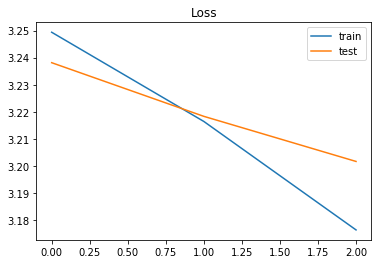

In [23]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

KeyError: 'acc'

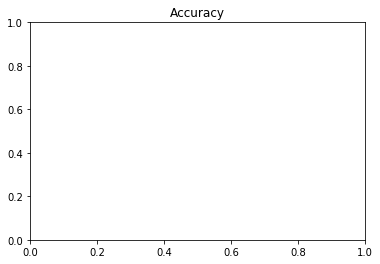

In [24]:

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [28]:
new_complaint = ['Please remove formatting for last 2 characters']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

IndexError: list index out of range